Epoch [100/2000], Loss: 0.0001
Epoch [200/2000], Loss: 0.0000
Epoch [300/2000], Loss: 0.0000
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0001
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000


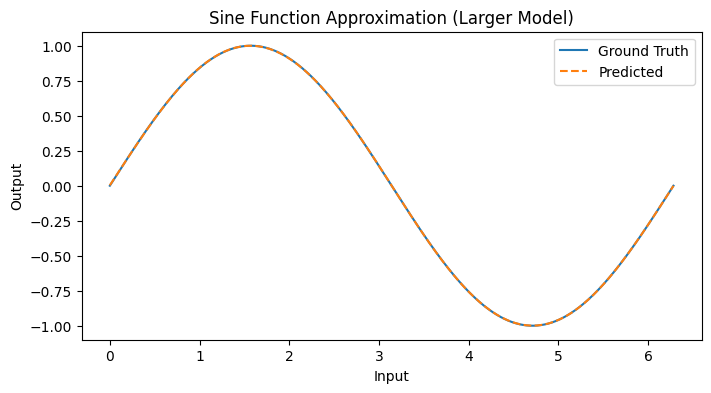

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchsummary

# Generate synthetic sine wave data
def generate_data():
    x = np.linspace(0, 2 * np.pi, 10000)
    y = np.sin(x)
    return x, y

# Define a larger neural network
class LargerSinApproximator(nn.Module):
    def __init__(self):
        super(LargerSinApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 128)  # Input: 1 feature, Output: 128 units
        self.fc2 = nn.Linear(128, 128)  # Hidden layer: 128 units
        self.fc3 = nn.Linear(128, 64)   # Hidden layer: 64 units
        self.fc4 = nn.Linear(64, 1)    # Output: 1 feature

    def forward(self, x):
        x = torch.sin(self.fc1(x))
        x = torch.sin(self.fc2(x))
        x = torch.sin(self.fc3(x))
        x = self.fc4(x)
        return x

# Train the neural network
def train_network(model, x_train, y_train, epochs=2000, lr=0.001):
    criterion = nn.MSELoss()  # Mean Squared Error loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        inputs = torch.from_numpy(x_train).float()
        targets = torch.from_numpy(y_train).float()
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Generate and train
x_train, y_train = generate_data()
larger_model = LargerSinApproximator()
#larger_model.to('cuda')
#torchsummary.summary(larger_model, (1,))
train_network(larger_model, x_train, y_train)

# Test the trained model
x_test = np.linspace(0, 2 * np.pi, 100)
x_test = torch.from_numpy(x_test).float()
with torch.no_grad():
    y_pred = larger_model(x_test.unsqueeze(1))

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(x_train, y_train, label='Ground Truth')
plt.plot(x_test.numpy(), y_pred.numpy(), label='Predicted', linestyle='--')
plt.legend()
plt.title('Sine Function Approximation (Larger Model)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
